# Index

#### 1. EDA ( Exploratory Data Analysis) 

- [Upvotes](#upvotes)
- [Views](#views)
- [Username](#username)
- [Answers](#answers)
- [Reputation](#reputation)
- [Tag](#tag)
- [ID](#id)

#### 2. Feature engineering 
[Link](#feature)
#### 3. Modelling
- Without Username feature
[Link](#modelling)

- MSE score was 1123.1773891912			
#### 4. with username feature
    - [link](#withusername)
#### 4. With Hyper parameter tuning 
    

## Undertstanding the data ( EDA )

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis


In [27]:
df= pd.read_csv("train_NIR5Yl1.csv")


## Undertstanding the data ( EDA )

-------------------------------------------
## Upvotes  <a id = 'upvotes'></a>

<AxesSubplot:>

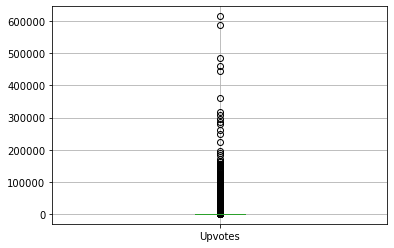

In [8]:
df.boxplot(column='Upvotes')

# it seems it has too many values out side the box

<AxesSubplot:ylabel='Density'>

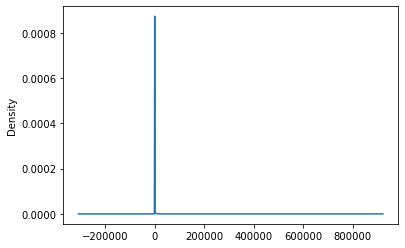

In [10]:
# try with kde plot

df.Upvotes.plot.kde()

In [31]:
df.Upvotes.describe()

count    330045.000000
mean        337.505358
std        3592.441135
min           0.000000
25%           8.000000
50%          28.000000
75%         107.000000
max      615278.000000
Name: Upvotes, dtype: float64

In [18]:
df.Upvotes.quantile(0.95)

959.0

In [30]:
df[df.Upvotes>1000].shape

(15919, 7)

##### Key Observations:
- Minimum upvotes are 0
- Max upvotes are 615278
- median is at 28
- even 3rd quartile is at 107
- only around 5% of whole questions have above 1000 upvotes. 

-----------------------------------

## Views <a id = 'views'></a> 

<AxesSubplot:ylabel='Density'>

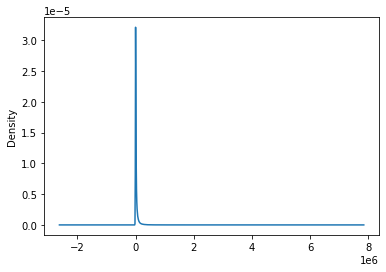

In [35]:
df.Views.plot.kde()

<AxesSubplot:>

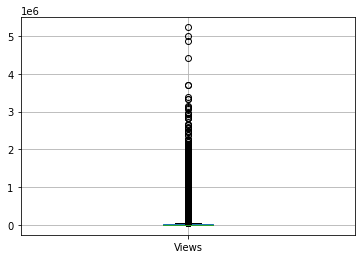

In [36]:
df.boxplot('Views')

In [53]:
df.Views.describe()

count    3.300450e+05
mean     2.964507e+04
std      8.095646e+04
min      9.000000e+00
25%      2.594000e+03
50%      8.954000e+03
75%      2.687000e+04
max      5.231058e+06
Name: Views, dtype: float64

In [54]:
# lets check how many values are out of the 1.5*IQR = 1.5*(Q3-Q1)

iqr = (df.Views.quantile(.75) - df.Views.quantile(.25)) 
print(iqr)

maxrange = df.Views.quantile(.75) + 1.5*iqr
minrange = df.Views.quantile(.75) - 1.5*iqr
print('min range of box',maxrange)
print('Max range of box',minrange)


24276.0
min range of box 63284.0
Max range of box -9544.0


In [59]:
# outliers detection

df[(df.Views>maxrange) | (df.Views<minrange)].shape

(35961, 7)

###### There are 35961 entries in data which are outside the box and can be considered as outliers. 
###### However this scenario needs these values, will discuss later. So we are not getting rid of these values. 

E:\SoftwareBinaries\miniconda\envs\test_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Views', ylabel='Upvotes'>

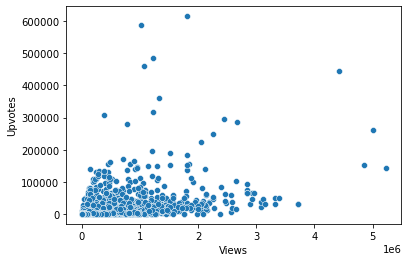

In [100]:
# Comparing views with upvotes

sns.scatterplot(df.Views, df.Upvotes)

#### Views increase more rapdly as compared to Upvotes

-----------------------------------------
## Username <a id = 'username'></a>

As name suggests, it looks like a categorical variable. Kind of user id, unique for each user.
From this column, we can find out the how active the user is. How many questions user has raised.

In [65]:
df.Username.value_counts()

4118     797
17878    608
45704    483
23223    413
6697     408
        ... 
33671      1
64392      1
62345      1
60298      1
0          1
Name: Username, Length: 141802, dtype: int64

- user#4118 has raised questions 797 times
- user#60298 has raised questions 1 time only

This information would be useful in modelling to calculate the upvote count

<AxesSubplot:xlabel='count', ylabel='mean'>

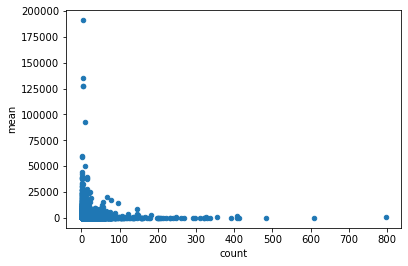

In [113]:
df.groupby('Username').Upvotes.agg(['count','mean']).sort_values(by='count', ascending= False).plot.scatter('count','mean')

##### User who has raised questions around 800 times, he also have less average views.

-----------------------
## Answers <a id = 'answers'>

<AxesSubplot:ylabel='Density'>

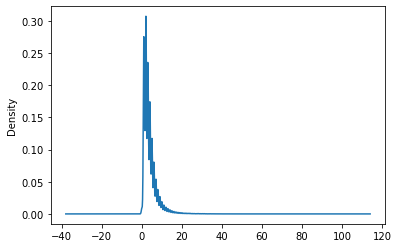

In [71]:
df.Answers.plot.kde()

In [72]:
df.Answers.describe()

count    330045.000000
mean          3.917672
std           3.579515
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max          76.000000
Name: Answers, dtype: float64

In [114]:
df.Answers.mode()

0    2.0
dtype: float64

E:\SoftwareBinaries\miniconda\envs\test_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Answers', ylabel='Upvotes'>

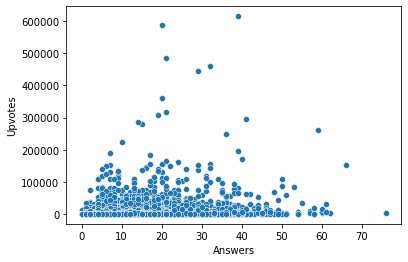

In [115]:
sns.scatterplot(df.Answers, df.Upvotes)

-----------------
## Reputation <a id = 'reputation'>

<AxesSubplot:ylabel='Density'>

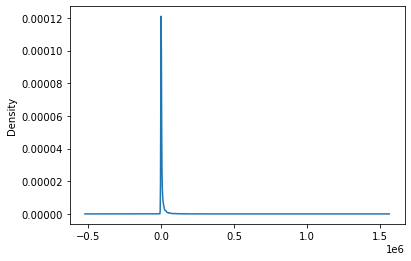

In [76]:
df.Reputation.plot.kde()

In [79]:
df.Reputation.apply(lambda x : x/1000).describe()

count    330045.000000
mean          7.773147
std          27.061413
min           0.000000
25%           0.282000
50%           1.236000
75%           5.118000
max        1042.428000
Name: Reputation, dtype: float64

E:\SoftwareBinaries\miniconda\envs\test_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reputation', ylabel='Upvotes'>

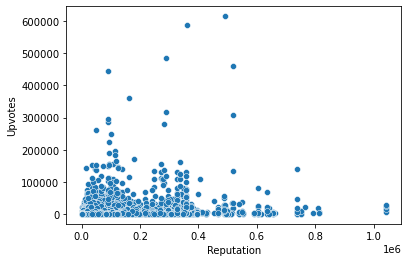

In [116]:
sns.scatterplot(df.Reputation, df.Upvotes)

<AxesSubplot:xlabel='Reputation', ylabel='Upvotes'>

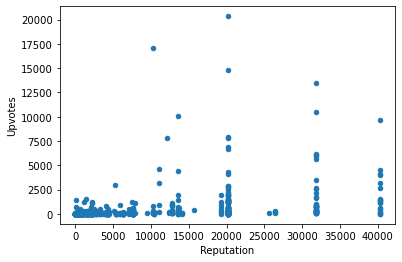

In [127]:
df[df.Username==4118].plot.scatter('Reputation','Upvotes')

##### As reputation increases , chances of getting upvotes also increases
##### Checked on total data and for single user also.

-----------------------------
## Tags  <a id = 'tag'>

In [90]:
df.Tag.unique()

array(['a', 'c', 'r', 'j', 'p', 's', 'h', 'o', 'i', 'x'], dtype=object)

In [91]:
df.Tag.value_counts()

c    72458
j    72232
p    43407
i    32400
a    31695
s    23323
h    20564
o    14546
r    12442
x     6978
Name: Tag, dtype: int64

<AxesSubplot:>

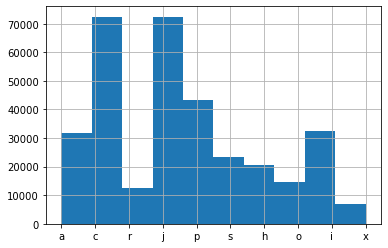

In [93]:
df.Tag.hist()

array([<AxesSubplot:title={'center':'count'}, xlabel='Tag'>,
       <AxesSubplot:title={'center':'mean'}, xlabel='Tag'>], dtype=object)

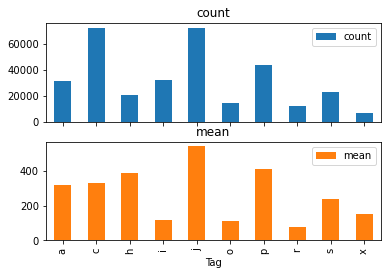

In [141]:
df.groupby('Tag').Upvotes.agg(['count','mean']).plot.bar(subplots= True)

##### General trend is 'more count for specific tag means more upvotes for same tag'.
##### Only h and c has different results. 

------------------
## ID  <a id = 'id'>

In [98]:
df.ID.nunique() , df.shape

(330045, (330045, 7))

###### All are unique, ID would not bring any value to the model. so can be removed easily.

-------------------------------------
## Feature engineering <a id = 'feature'>

##### Before going ahead , lets merge the test and train data for all same update in both

In [28]:
df_train = pd.read_csv("train_NIR5Yl1.csv")
df_test = pd.read_csv("test_8i3B3FC.csv")

In [29]:
df_train.shape, df_test.shape

((330045, 7), (141448, 6))

In [30]:
df_train['type']='Train'
df_test['type']='Test'

In [31]:
df = pd.concat([df_train,df_test])

In [32]:
# Removing ID feature 

In [33]:
df.drop(columns='ID', inplace=True)

In [34]:
df

,Tag,Reputation,Answers,Username,Views,Upvotes,type
0,a,3942.0,2.0,155623,7855.0,42.0,Train
1,a,26046.0,12.0,21781,55801.0,1175.0,Train
2,c,1358.0,4.0,56177,8067.0,60.0,Train
3,a,264.0,3.0,168793,27064.0,9.0,Train
4,c,4271.0,4.0,112223,13986.0,83.0,Train
...,...,...,...,...,...,...,...
141443,j,4681.0,4.0,152060,2469.0,NaN,Test
141444,j,7782.0,3.0,89235,18998.0,NaN,Test
141445,p,435.0,5.0,119788,57048.0,NaN,Test
141446,o,176.0,3.0,86824,10193.0,NaN,Test


In [35]:
df = pd.get_dummies(df, columns=['Tag'], drop_first=True)

In [36]:
df

,Reputation,Answers,Username,Views,Upvotes,type,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x
0,3942.0,2.0,155623,7855.0,42.0,Train,0,0,0,0,0,0,0,0,0
1,26046.0,12.0,21781,55801.0,1175.0,Train,0,0,0,0,0,0,0,0,0
2,1358.0,4.0,56177,8067.0,60.0,Train,1,0,0,0,0,0,0,0,0
3,264.0,3.0,168793,27064.0,9.0,Train,0,0,0,0,0,0,0,0,0
4,4271.0,4.0,112223,13986.0,83.0,Train,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141443,4681.0,4.0,152060,2469.0,NaN,Test,0,0,0,1,0,0,0,0,0
141444,7782.0,3.0,89235,18998.0,NaN,Test,0,0,0,1,0,0,0,0,0
141445,435.0,5.0,119788,57048.0,NaN,Test,0,0,0,0,0,1,0,0,0
141446,176.0,3.0,86824,10193.0,NaN,Test,0,0,0,0,1,0,0,0,0


In [39]:
# seperating the train and test data

df_train = df[df['type']=='Train']
df_test = df[df['type']=='Test']

In [41]:
df_train.shape, df_test.shape

((330045, 15), (141448, 15))

In [42]:
df_train.columns

Index(['Reputation', 'Answers', 'Username', 'Views', 'Upvotes', 'type',
       'Tag_c', 'Tag_h', 'Tag_i', 'Tag_j', 'Tag_o', 'Tag_p', 'Tag_r', 'Tag_s',
       'Tag_x'],
      dtype='object')

In [ ]:
df

## 1st try: Modelling <a id = 'modelling'>


In [40]:
# first lets try with statmodel just to check the statiscal significance of the features

In [48]:
import statsmodels.api as sm


In [74]:
X = df_train.drop(columns=['Upvotes','Username','type'])

In [75]:
X

,Reputation,Answers,Views,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x
0,3942.0,2.0,7855.0,0,0,0,0,0,0,0,0,0
1,26046.0,12.0,55801.0,0,0,0,0,0,0,0,0,0
2,1358.0,4.0,8067.0,1,0,0,0,0,0,0,0,0
3,264.0,3.0,27064.0,0,0,0,0,0,0,0,0,0
4,4271.0,4.0,13986.0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
330040,36.0,2.0,1063.0,1,0,0,0,0,0,0,0,0
330041,1649.0,2.0,23319.0,1,0,0,0,0,0,0,0,0
330042,6178.0,2.0,2453.0,1,0,0,0,0,0,0,0,0
330043,89.0,2.0,2107.0,0,0,0,1,0,0,0,0,0


In [45]:
y = df_train.Upvotes

In [46]:
X.shape, y.shape

((330045, 12), (330045,))

In [49]:
X_s = sm.add_constant(X)


In [50]:
model = sm.OLS(y,X_s)

In [51]:
results = model.fit()

In [52]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Upvotes   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     9446.
Date:                Thu, 11 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:32:41   Log-Likelihood:            -3.1215e+06
No. Observations:              330045   AIC:                         6.243e+06
Df Residuals:                  330032   BIC:                         6.243e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -364.1599     18.632    -19.545      0.000    -400.677    -327.642
Reputation     0.0337      0.000    168.260      0.000       0.033       0.034
Answers      -36.7055      1.751    -20.968      0.000     -40.137     -33.275
Views          0.0199   7.72e-05    257.662      0.000       0.020       0.020
Tag_c        -47.7449     20.897     -2.285      0.022     -88.702      -6.788
Tag_h        -23.0939     27.770     -0.832      0.406     -77.522      31.334
Tag_i        125.6756     24.514      5.127      0.000      77.630     173.722
Tag_j        -76.2449     20.903     -3.647      0.000    -117.215     -35.275
Tag_o        141.1860     31.076      4.543      0.000      80.278     202.094
Tag_p        -14.2683     22.911     -0.623      0.533     -59.172      30.636
Tag_r        110.1684     32.925      3.346      0.001      45.636     174.700
Tag_s         -0.5413     26.759     -0.020      0.984     -52.987      51.905
Tag_x         78.8832     41.048      1.922      0.055      -1.571     159.337
==============================================================================
Omnibus:                  1224094.248   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1678736872412.292
Skew:                          80.742   Prob(JB):                         0.00
Kurtosis:                   11050.499   Cond. No.                     9.55e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###### So most of the features are statistically significant, but tag "p,h,s" are not showing any significance. Either we can remove them and go ahead with model. Model will take care of it.
# first R&d

-----------------------------------------
#### Lets apply traditional models


In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [77]:
lr = LinearRegression()
rf = RandomForestRegressor()
xg = XGBRegressor()

lr.fit(X_train,y_train)
rf.fit(X_train,y_train)
xg.fit(X_train,y_train)

### Testing the models

In [81]:
lr_pred= lr.predict(X_test)
rf_pred = rf.predict(X_test)
xg_pred = xg.predict(X_test)

In [84]:
mean_squared_error(y_test,lr_pred), mean_squared_error(y_test,xg_pred)

(10986003.060170015, 2040272.0619482414)

In [85]:
# linear regression
np.sqrt(mean_squared_error(y_test,lr_pred))

3314.5140005994867

In [86]:
# random forest
np.sqrt(mean_squared_error(y_test,rf_pred))

1276.7452076888978

In [87]:
# xgboost
np.sqrt(mean_squared_error(y_test,xg_pred))

1428.3809232653036

In [88]:
# work on username and hyperparameter tuning

### Predicting actual data

In [89]:
X_train.shape

(221130, 12)

In [95]:
df_test.columns

Index(['Reputation', 'Answers', 'Username', 'Views', 'Upvotes', 'type',
       'Tag_c', 'Tag_h', 'Tag_i', 'Tag_j', 'Tag_o', 'Tag_p', 'Tag_r', 'Tag_s',
       'Tag_x'],
      dtype='object')

In [97]:
df_test = df_test.drop(columns=['Username','Upvotes','type'])

In [98]:
df_pred = rf.predict(df_test)

In [101]:
df_pred

array([220.66,  72.8 ,  40.06, ...,  75.64,  14.84,  27.04])

In [119]:
df_final= pd.DataFrame([pd.read_csv("test_8i3B3FC.csv")['ID'],df_pred])
df_final=df_final.T
df_final.columns = ['ID','Upvotes']
df_final.to_csv('rf_results.csv',index=False)

In [123]:
df_final

,ID,Upvotes
0,366953.0,220.66
1,71864.0,72.80
2,141692.0,40.06
3,316833.0,11.90
4,440445.0,323.95
...,...,...
141443,47187.0,36.42
141444,329126.0,202.79
141445,282334.0,75.64
141446,386629.0,14.84


--------------------------------


## 2nd try: With Username feature (Modelling again from scratch)  <a id = 'withusername'>

In [140]:
df_train = pd.read_csv("train_NIR5Yl1.csv")
df_test = pd.read_csv("test_8i3B3FC.csv")

<AxesSubplot:xlabel='count', ylabel='mean'>

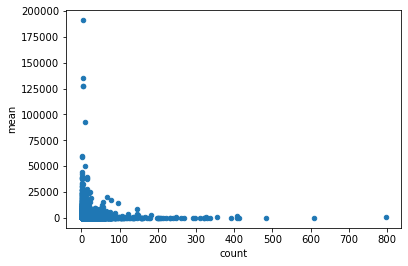

In [141]:
df_train.groupby('Username').Upvotes.agg(['count','mean']).sort_values(by='count', ascending= False).plot.scatter('count','mean')

In [142]:
gb = df_train.groupby('Username').Upvotes.agg(['count','mean'])
gb

,count,mean
Username,,
0,1,10.0
1,1,0.0
2,1,1.0
3,1,73.0
5,1,14.0
...,...,...
175733,1,52.0
175734,1,1.0
175735,1,12.0


In [143]:
df_train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [205]:
try:
    gb.loc[100000000000]
    
except:
    print('hello')

hello


In [300]:
def updatecount(d):
    try:
        return gb.loc[d.Username]
    except:
        return np.nan

In [225]:
# applying on both

df_train['how_frequent_user_is'] = df_train.apply(updatecount,axis=1)


##### for test dataset

In [227]:
gb_test = df_test.Username.value_counts()
gb_test

4118     336
17878    228
45704    205
62142    200
23223    199
        ... 
96096      1
40797      1
38748      1
42842      1
2049       1
Name: Username, Length: 79351, dtype: int64

In [260]:
gb_train = df_train.Username.value_counts()
gb_train

4118     797
17878    608
45704    483
23223    413
6697     408
        ... 
33671      1
64392      1
62345      1
60298      1
0          1
Name: Username, Length: 141802, dtype: int64

In [273]:
gb_train.shape, gb_test.shape

((141802,), (79351,))

In [291]:
test_= list(set(gb_test.index) - set(gb_train.index))

In [277]:
gb_test[4118], gb_train[4118]

(336, 797)

In [283]:

temp = {}
for i,d in gb_train.iteritems():
    if i in gb_test.index:
        temp[i] = gb_train.loc[i] + gb_test.loc[i]
    else:
        temp[i] = gb_train.loc[i]

        
gb_final = pd.Series(temp)


In [297]:

temp = {}

for j in test_:
    temp[j]= gb_test.loc[j]
    

gb_final= gb_final.append(pd.Series(temp))   

In [298]:
gb_final.shape

(175739,)

In [299]:
gb_final

4118      1133
17878      836
45704      688
23223      612
6697       598
          ... 
131026       1
131043       2
131044       1
131047       2
131058       1
Length: 175739, dtype: int64

In [302]:
def updatecount(d):
    try:
        return gb_final.loc[d.Username]
    except:
        return np.nan

In [303]:

df_test['how_frequent_user_is'] = df_test.apply(updatecount,axis=1)


In [304]:
df_test

,ID,Tag,Reputation,Answers,Username,Views,how_frequent_user_is
0,366953,a,5645.0,3.0,50652,33200.0,2
1,71864,c,24511.0,6.0,37685,2730.0,37
2,141692,i,927.0,1.0,135293,21167.0,7
3,316833,i,21.0,6.0,166998,18528.0,2
4,440445,i,4475.0,10.0,53504,57240.0,7
...,...,...,...,...,...,...,...
141443,47187,j,4681.0,4.0,152060,2469.0,4
141444,329126,j,7782.0,3.0,89235,18998.0,215
141445,282334,p,435.0,5.0,119788,57048.0,1
141446,386629,o,176.0,3.0,86824,10193.0,10


In [305]:
df_train

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,how_frequent_user_is
0,52664,a,3942.0,2.0,155623,7855.0,42.0,19.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0,2.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0,1.0
3,96996,a,264.0,3.0,168793,27064.0,9.0,3.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0,3.0
...,...,...,...,...,...,...,...,...
330040,339800,c,36.0,2.0,84919,1063.0,0.0,1.0
330041,253800,c,1649.0,2.0,76730,23319.0,73.0,2.0
330042,210756,c,6178.0,2.0,91701,2453.0,15.0,4.0
330043,56089,j,89.0,2.0,80245,2107.0,3.0,1.0


In [308]:
# remove username,  ID, 

df_test.drop(['Username','ID'], axis=1, inplace=True)
df_train.drop(['Username','ID'], axis=1, inplace=True)

In [312]:
df_train=pd.get_dummies(df_train, columns=['Tag'], drop_first=True)
df_test=pd.get_dummies(df_test, columns=['Tag'], drop_first=True)

In [313]:
df_train.shape, df_test.shape

((330045, 14), (141448, 13))

In [314]:
X = df_train.drop('Upvotes', axis=1)

In [315]:
y = df_train.Upvotes

In [319]:
X.columns, df_test.columns #' sequence is same'

(Index(['Reputation', 'Answers', 'Views', 'how_frequent_user_is', 'Tag_c',
        'Tag_h', 'Tag_i', 'Tag_j', 'Tag_o', 'Tag_p', 'Tag_r', 'Tag_s', 'Tag_x'],
       dtype='object'),
 Index(['Reputation', 'Answers', 'Views', 'how_frequent_user_is', 'Tag_c',
        'Tag_h', 'Tag_i', 'Tag_j', 'Tag_o', 'Tag_p', 'Tag_r', 'Tag_s', 'Tag_x'],
       dtype='object'))

In [320]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [321]:
lr = LinearRegression()
rf = RandomForestRegressor()
xg = XGBRegressor()

lr.fit(X_train,y_train)
rf.fit(X_train,y_train)
xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [322]:
lr_pred= lr.predict(X_test)
rf_pred = rf.predict(X_test)
xg_pred = xg.predict(X_test)

In [323]:
# linear regression
np.sqrt(mean_squared_error(y_test,lr_pred))

3314.550523094266

In [324]:
# random forest
np.sqrt(mean_squared_error(y_test,rf_pred))

1298.0747023975123

In [325]:
# xgboost
np.sqrt(mean_squared_error(y_test,xg_pred))

1450.277772876035

### Hyperparameter tuning <a id = 'hyper'>

In [327]:
# Lets try with randomizedsearchCV
from sklearn.model_selection import RandomizedSearchCV


model = XGBRegressor()

n_estimators = [100,600,1500]
max_depth = [2,9,15]
booster = ['gbtree', 'gblinear']
learning_rate = [0.02,0.1,0.2]
min_child_weight = [1,3,6]
base_score = [0.2,0.6,1]

hyperparameter_grid = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'learning_rate' : learning_rate,
    'min_child_weight':min_child_weight,
    'booster': booster,
    'base_score': base_score   
    
}


random_cv = RandomizedSearchCV(estimator=model,param_distributions=hyperparameter_grid,
                              cv= 5, n_iter = 20,
                              scoring = 'neg_root_mean_squared_error',
                              n_jobs = 4,
                              verbose = 5,
                              return_train_score = True,
                              random_state= 42)

random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   29.8s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed: 16.0min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 21.7min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          tree_method=None,
                                          validate_parameters=None,
                                          verbosity=None),
   

In [328]:
random_cv.best_estimator_

XGBRegressor(base_score=0.6, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=600, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [330]:
# repeating the XGB with best estimators from randomsearchcv

model = XGBRegressor(base_score=0.6, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=3, missing=np.nan, monotone_constraints='()',
             n_estimators=600, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [331]:
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9180352946269834

In [339]:
y_pred = model.predict(X_test)

In [340]:
np.sqrt(mean_squared_error(y_test,y_pred))
# df_pred.shape,y_test.shape,X_test.shape

1085.5274691728641

In [332]:
df_pred = model.predict(df_test)

In [333]:
df_final= pd.DataFrame([pd.read_csv("test_8i3B3FC.csv")['ID'],df_pred])
df_final=df_final.T
df_final.columns = ['ID','Upvotes']
df_final.to_csv('hp_results.csv',index=False)

# 3rd try: 
- normalizing the data

In [423]:
import warnings
warnings.filterwarnings("ignore") 

In [443]:
df_train = pd.read_csv("train_NIR5Yl1.csv")
df_test = pd.read_csv("test_8i3B3FC.csv")

In [444]:
df_test.isnull().sum() # nonull values

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
dtype: int64

In [445]:
df_train = pd.get_dummies(df_train, columns=['Tag'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Tag'], drop_first=True)

In [446]:
df_train.drop(columns=['Username','ID'], inplace=True)
df_test.drop(columns=['Username','ID'],inplace=True)

In [447]:
X = df_train.drop(columns=['Upvotes'])
y = df_train.Upvotes

In [448]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [449]:
X.shape, df_test.shape # features in both should be same

((330045, 12), (141448, 12))

In [461]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


In [451]:
mm = MinMaxScaler()
ss = StandardScaler()

In [452]:
X.columns

Index(['Reputation', 'Answers', 'Views', 'Tag_c', 'Tag_h', 'Tag_i', 'Tag_j',
       'Tag_o', 'Tag_p', 'Tag_r', 'Tag_s', 'Tag_x'],
      dtype='object')

In [453]:
X_train[['Reputation','Answers','Views']] = mm.fit_transform(X_train[['Reputation','Answers','Views']])
X_test[['Reputation','Answers','Views']] = mm.transform(X_test[['Reputation','Answers','Views']])


In [454]:
df_test[['Reputation','Answers','Views']] = mm.transform(df_test[['Reputation','Answers','Views']])

In [455]:
df_test.head()

,Reputation,Answers,Views,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x
0,0.005415,0.039474,0.006344,0,0,0,0,0,0,0,0,0
1,0.023513,0.078947,0.000519,1,0,0,0,0,0,0,0,0
2,0.000889,0.013158,0.004044,0,0,1,0,0,0,0,0,0
3,0.000020,0.078947,0.003539,0,0,1,0,0,0,0,0,0
4,0.004293,0.131579,0.010940,0,0,1,0,0,0,0,0,0


<AxesSubplot:ylabel='Density'>

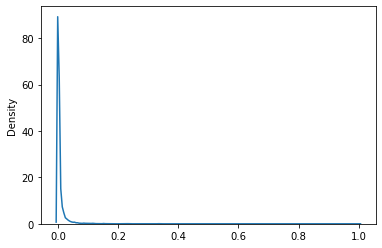

In [395]:
sns.kdeplot(mm.fit_transform(df_train[['Reputation']]).ravel())

In [425]:
# Lets try with randomizedsearchCV
from sklearn.model_selection import RandomizedSearchCV


model = XGBRegressor()

n_estimators = [100,600,1500]
max_depth = [2,9,15]
booster = ['gbtree']
learning_rate = [0.02,0.1,0.2]
min_child_weight = [1,3,6]
base_score = [0.2,0.6,1]

hyperparameter_grid = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'learning_rate' : learning_rate,
    'min_child_weight':min_child_weight,
    'booster': booster,
    'base_score': base_score   
    
}


random_cv = RandomizedSearchCV(estimator=model,param_distributions=hyperparameter_grid,
                              cv= 5, n_iter = 10,
                              scoring = 'neg_root_mean_squared_error',
                              n_jobs = 4,
                              verbose = 5,
                              return_train_score = True,
                              random_state= 42)

random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed: 43.9min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validat

In [426]:
random_cv.best_estimator_

XGBRegressor(base_score=0.6, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=1500, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [427]:
model = XGBRegressor(base_score=0.6, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=3, missing=np.nan, monotone_constraints='()',
             n_estimators=1500, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [429]:
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9093441710985515

In [430]:
y_pred = model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

In [458]:
df_pred

array([241.27638 , 179.98677 ,  50.344074, ...,  55.605858,  17.546793,
        34.657795], dtype=float32)

In [456]:
df_pred = model.predict(df_test)

In [459]:
df_final= pd.DataFrame([pd.read_csv("test_8i3B3FC.csv")['ID'],df_pred])
df_final=df_final.T
df_final.columns = ['ID','Upvotes']
df_final.to_csv('mm_results.csv',index=False)

-------------------------
# With Robustscaler

In [2]:
df_train = pd.read_csv("train_NIR5Yl1.csv")
df_test = pd.read_csv("test_8i3B3FC.csv")

In [3]:
df_test.isnull().sum() # nonull values

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
dtype: int64

In [464]:
df_train = pd.get_dummies(df_train, columns=['Tag'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Tag'], drop_first=True)

In [465]:
df_train.drop(columns=['Username','ID'], inplace=True)
df_test.drop(columns=['Username','ID'],inplace=True)

In [466]:
X = df_train.drop(columns=['Upvotes'])
y = df_train.Upvotes

In [467]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [468]:
X.shape, df_test.shape # features in both should be same

((330045, 12), (141448, 12))

In [75]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


In [471]:
rs = RobustScaler()


In [472]:
X.columns

Index(['Reputation', 'Answers', 'Views', 'Tag_c', 'Tag_h', 'Tag_i', 'Tag_j',
       'Tag_o', 'Tag_p', 'Tag_r', 'Tag_s', 'Tag_x'],
      dtype='object')

In [473]:
X_train[['Reputation','Answers','Views']] = rs.fit_transform(X_train[['Reputation','Answers','Views']])
X_test[['Reputation','Answers','Views']] = rs.transform(X_test[['Reputation','Answers','Views']])


In [474]:
df_test[['Reputation','Answers','Views']] = rs.transform(df_test[['Reputation','Answers','Views']])

In [483]:
model = XGBRegressor(base_score=0.6, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=3, missing=np.nan, monotone_constraints='()',
             n_estimators=1500, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [484]:
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.909426692924146

In [485]:
y_pred = model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

1179.0664711959382

In [486]:
df_pred = model.predict(df_test)

In [487]:
df_final= pd.DataFrame([pd.read_csv("test_8i3B3FC.csv")['ID'],df_pred])
df_final=df_final.T
df_final.columns = ['ID','Upvotes']
df_final.to_csv('rs_results.csv',index=False)

## 4th try- outliers

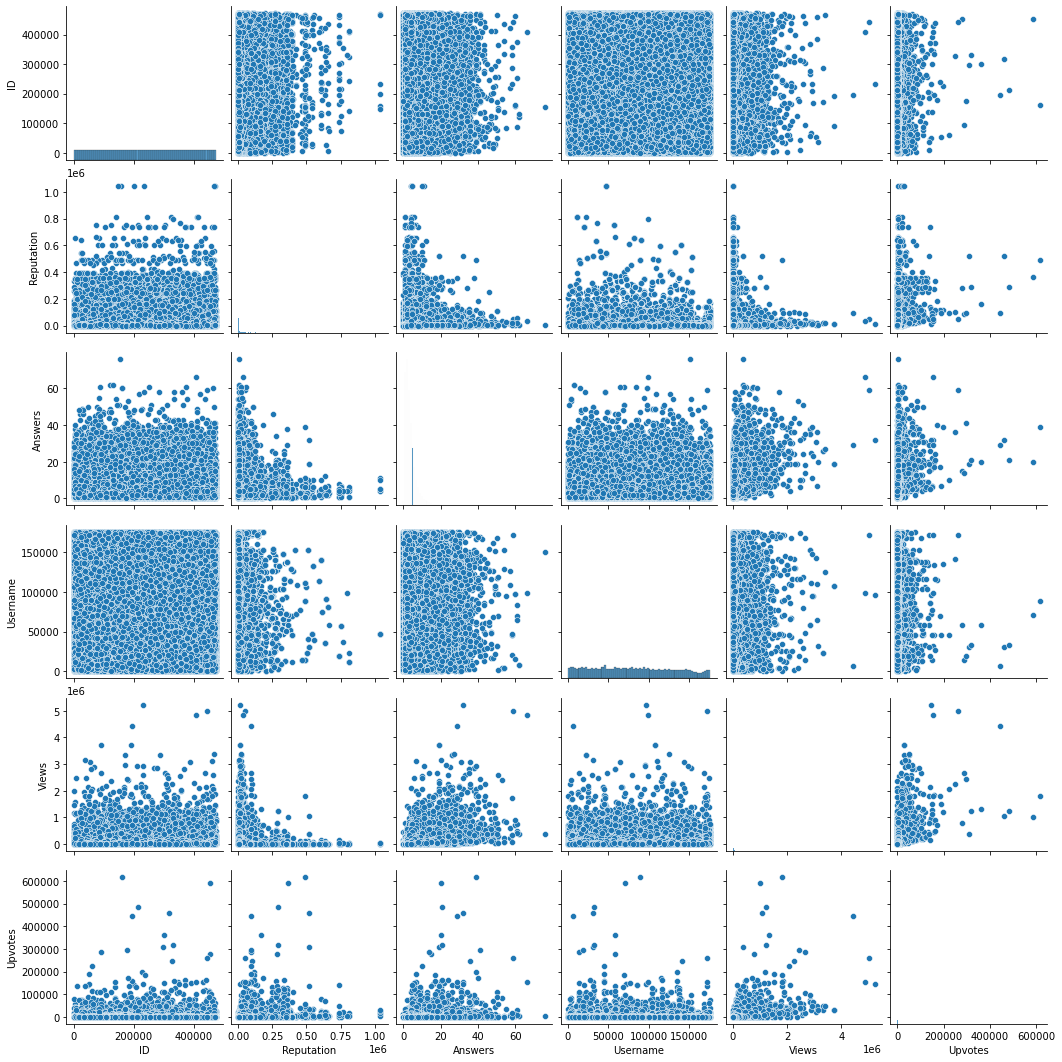

In [4]:
sns.pairplot(df_train)

In [19]:
pd.cut(np,300).value_counts()

(-615.278, 2050.927]        321686
(2050.927, 4101.853]          4212
(4101.853, 6152.78]           1528
(6152.78, 8203.707]            722
(8203.707, 10254.633]          460
                             ...  
(283027.88, 285078.807]          0
(280976.953, 283027.88]          0
(278926.027, 280976.953]         0
(449152.94, 451203.867]          0
(305588.073, 307639.0]           0
Name: Upvotes, Length: 300, dtype: int64

In [13]:
df_train.Upvotes.mean()

337.5053583602236

In [14]:
df_train.Upvotes.median()

28.0

In [15]:
pd.qcut(df_train.Upvotes,2).value_counts()

(-0.001, 28.0]      167324
(28.0, 615278.0]    162721
Name: Upvotes, dtype: int64

In [36]:
a =np.array(a)

In [46]:
np.unique(a[a<0])

array([-inf])

In [42]:
a.shape

(330045,)

In [47]:
s = df_train.Upvotes.std()

In [48]:
s

3592.4411351572844

In [49]:
m=df_train.Upvotes.mean()
m

337.5053583602236

# for 99%, values are covered within 6sigma

In [53]:
higher = m + 3*s
lower= m-3*s

In [57]:
higher, lower

(11114.828763832076, -10439.818047111628)

In [62]:
df_train= df_train[(df_train.Upvotes>lower) & (df_train.Upvotes<higher)]

(330045, 7)

In [ ]:
df_train = pd.get_dummies(df_train, columns=['Tag'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Tag'], drop_first=True)

In [64]:
df_train.drop(columns=['Username','ID'], inplace=True)
df_test.drop(columns=['Username','ID'],inplace=True)

E:\SoftwareBinaries\miniconda\envs\test_env\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [65]:
df_train

,Tag,Reputation,Answers,Views,Upvotes
0,a,3942.0,2.0,7855.0,42.0
1,a,26046.0,12.0,55801.0,1175.0
2,c,1358.0,4.0,8067.0,60.0
3,a,264.0,3.0,27064.0,9.0
4,c,4271.0,4.0,13986.0,83.0
...,...,...,...,...,...
330040,c,36.0,2.0,1063.0,0.0
330041,c,1649.0,2.0,23319.0,73.0
330042,c,6178.0,2.0,2453.0,15.0
330043,j,89.0,2.0,2107.0,3.0


In [71]:
df_train = pd.get_dummies(df_train, columns=['Tag'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Tag'], drop_first=True)

In [72]:
X = df_train.drop(columns=['Upvotes'])
y = df_train.Upvotes

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
X_train.shape, df_test.shape, X_test.shape

((263000, 12), (141448, 12), (65750, 12))

In [83]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)
y_pred = model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

In [86]:
df_pred = model.predict(df_test)

In [87]:
df_final= pd.DataFrame([pd.read_csv("test_8i3B3FC.csv")['ID'],df_pred])
df_final=df_final.T
df_final.columns = ['ID','Upvotes']
df_final.to_csv('withoutoutlier_results.csv',index=False)

In [88]:
df_final

,ID,Upvotes
0,366953.0,206.38
1,71864.0,66.60
2,141692.0,34.46
3,316833.0,12.01
4,440445.0,348.02
...,...,...
141443,47187.0,30.06
141444,329126.0,183.98
141445,282334.0,54.61
141446,386629.0,12.00


## logarithmic transformation of y 

In [91]:
df_train = pd.read_csv("train_NIR5Yl1.csv")
df_test = pd.read_csv("test_8i3B3FC.csv")

In [92]:
df_train = pd.get_dummies(df_train, columns=['Tag'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Tag'], drop_first=True)

In [93]:
df_train.drop(columns=['Username','ID'], inplace=True)
df_test.drop(columns=['Username','ID'],inplace=True)

In [99]:
X = df_train.drop(columns=['Upvotes'])
y = df_train.Upvotes

In [110]:
y = np.log(y)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)


0.8283337446280598

In [115]:
y_pred = model.predict(X_test)

np.sqrt(mean_squared_error(y_test,y_pred))

0.8283337446280598

In [116]:
df_pred = model.predict(df_test)
df_pred = np.exp(df_pred)
df_final= pd.DataFrame([pd.read_csv("test_8i3B3FC.csv")['ID'],df_pred])
df_final=df_final.T
df_final.columns = ['ID','Upvotes']
df_final.to_csv('logarithmic_results.csv',index=False)